# Introduction to Regression Neural network  with TensorFlow

- **Regression**: Predicting a number

There are many definitions for a regression problem but in our case, w're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

<img src="./course_images/regression_typical_architecture.png">

In [33]:
# Import TensorFlow
import tensorflow as tf

tf.__version__

'2.13.0'

## Creating data to view and fit


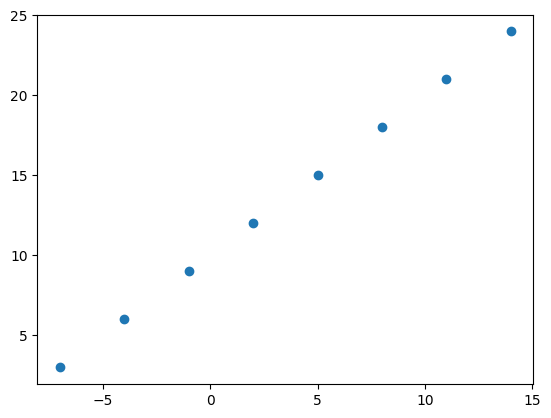

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (X)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize itt
plt.scatter(X, y)


In [35]:

X+10, y == X + 10

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

##  Input and output shapes

In [36]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [37]:
X[0], y[0]

(-7.0, 3.0)

In [38]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # no shape because scalar (rank ndim 0)

((), ())

In [39]:
X[0].ndim

0

In [40]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

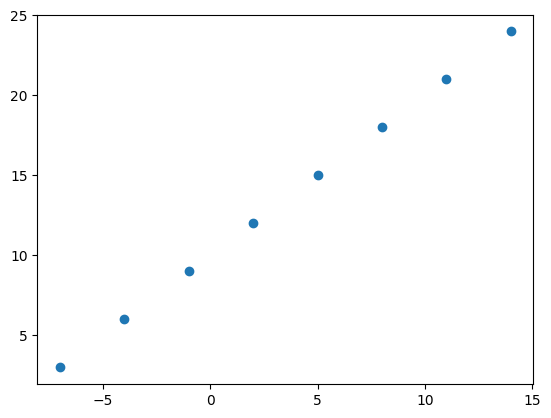

In [42]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss fonction (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between (features and labels).

<img src="./course_images/steps_modeling_tensorflow.png" >

<img src="./course_images/steps2_modeling_tensorflow.png" >

**VS CODE SHORTCUT**: pour voir la doc: ctrl + space / google colab: shift + ctrl + space

In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API ( you can add layer as list or .add())
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              #optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              optimizer="sgd",
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 247ms/step - loss: 18.1101 - mae: 18.1101
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 17.8288 - mae: 17.8288
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 17.5476 - mae: 17.5476
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 17.2663 - mae: 17.2663
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 16.9851 - mae: 16.9851


In [44]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 58ms/step


array([[-12.856369]], dtype=float32)

In [46]:
y_pred + 7

array([[-5.856369]], dtype=float32)

## Improving model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [47]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll try to train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 0s 241ms/step - loss: 10.4268 - mae: 10.4268
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2943 - mae: 10.2943
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1618 - mae: 10.1618
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0293 - mae: 10.0293
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8968 - mae: 9.8968
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7643 - mae: 9.7643
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6318 - mae: 9.6318
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4993 - mae: 9.4993
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3668 - mae: 9.3668
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2343 - mae: 9.2343
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1018 - 

In [48]:
# Remind ourselves of of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [49]:
# Let's see if our model's predication has improved...
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[30.016872]], dtype=float32)

<img src="./course_images/improving_model.png">

**the learning rate is the most important hyperparameter of many different neural networks**

In [50]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 0s 394ms/step - loss: 12.7621 - mae: 12.7621
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.0243 - mae: 12.0243
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2835 - mae: 11.2835
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5393 - mae: 10.5393
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7909 - mae: 9.7909
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0363 - mae: 9.0363
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2727 - mae: 8.2727
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4968 - mae: 7.4968
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8620 - mae: 6.8620
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9171 - mae: 6.9171
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1962 - 

In [51]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [52]:
# Let's try to make a predication
model.predict([17.0])


1/1 [==============================] - 0s 65ms/step


array([[28.324827]], dtype=float32)

⚠️Sometimes the predictions can be even worse yes losses and mae are lower. This result an **overfitting**. They are not always representating.

## Evaluating a model

In practice, a typical workflow you'll go through when build neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the orignal labels)?


In [53]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [54]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

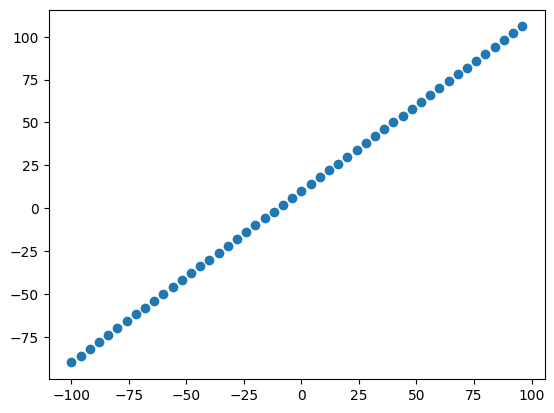

In [55]:
# Visualize the data
import matplotlib.pyplot as plt
# plt.plot(X, y)
plt.scatter(X, y) # cots


### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

<img src="./course_images/three_datasets.png">

In [56]:
# Check the length of how many samples we have
len(X)

50

In [57]:
# Split the data into train test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

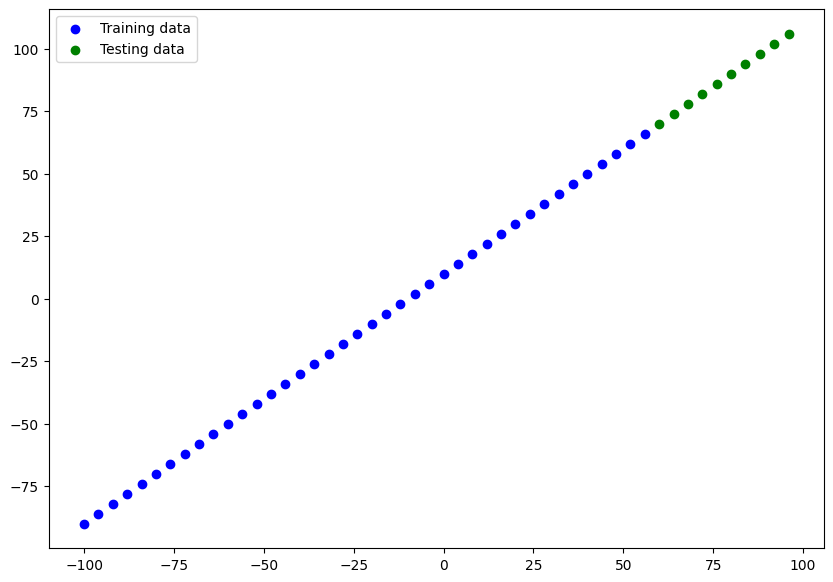

In [58]:
plt.figure(figsize=(10,7))
# Plot train data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # we want our model be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [59]:
# Let's have a look at how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [60]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [61]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [62]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # 1 number to predict 1 number,
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


**dense** == fully connected layers

In [63]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model
* **Trainable parameters** - these are the parameters ( patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖**Ressource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

http://introtodeeplearning.com/

In [64]:
# Let's fit our model to the training data ( verbosity mode)
model.fit(X_train, y_train, epochs=100, verbose=0)

In [65]:
# Get a summary of our model ( the number of sequential higher up because number of creation if the session evolve)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


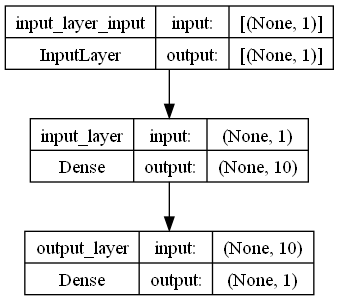

In [66]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predication

To visualize predications, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [67]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 75.98649 ],
       [ 80.93516 ],
       [ 85.883835],
       [ 90.832504],
       [ 95.78118 ],
       [100.72985 ],
       [105.67852 ],
       [110.62719 ],
       [115.57586 ],
       [120.52453 ]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [69]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

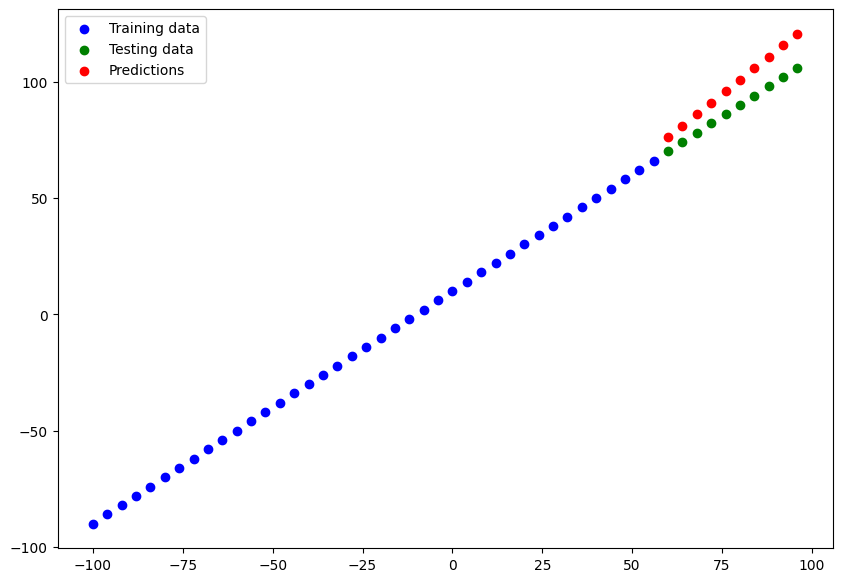

In [70]:
plot_predictions();

1/1 [==============================] - 0s 65ms/step


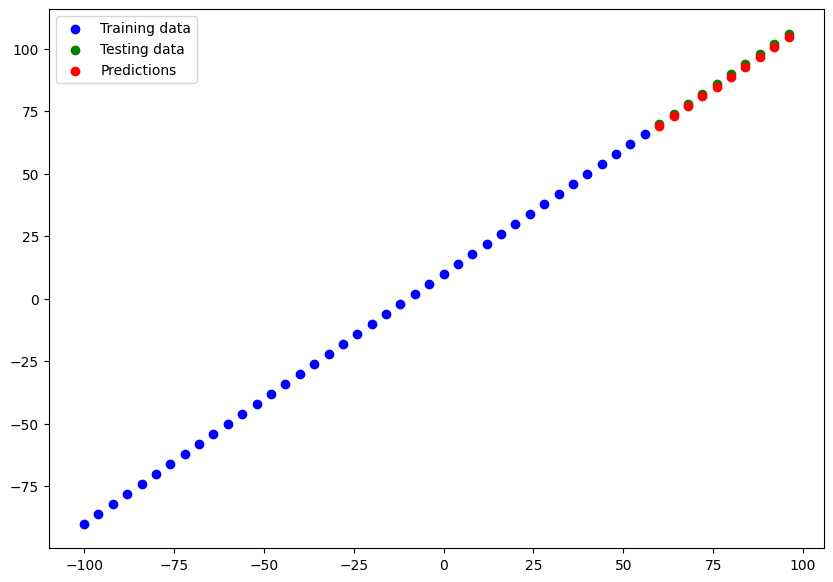

In [71]:
# Let's try to create a best model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"), # 1 number to predict 1 number,
    tf.keras.layers.Dense(1)
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=100, verbose=0)
y_pred = model.predict(X_test)
plot_predictions(predictions=y_pred) # why not actualizing if not set?

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the map metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

<img src="./course_images/regression_evaluation_metrics.png">

**Y^**= y_pred

In [72]:
# Evaluate the model on the test
model.evaluate(X_test, y_test) # returns loss + evaluation metrics

1/1 [==============================] - 0s 166ms/step - loss: 1.1851 - mae: 1.1851


[1.18505859375, 1.18505859375]

In [73]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.881165, 15.55907 , 13.009832, 11.233548, 10.23027 , 10.      ,
       10.542737, 11.858484, 13.947232, 16.80899 ], dtype=float32)>

In [74]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.118835],
       [ 73.05116 ],
       [ 76.98361 ],
       [ 80.91613 ],
       [ 84.84865 ],
       [ 88.781166],
       [ 92.713684],
       [ 96.64621 ],
       [100.57872 ],
       [104.51124 ]], dtype=float32)>

In [75]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [76]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.118835,  73.05116 ,  76.98361 ,  80.91613 ,  84.84865 ,
        88.781166,  92.713684,  96.64621 , 100.57872 , 104.51124 ],
      dtype=float32)>

In [77]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

# same as evaluate function

<tf.Tensor: shape=(), dtype=float32, numpy=1.1850593>

In [78]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.4419534>

In [79]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true,  tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

The machine learning practitioner's motto:

**Experiment, experiment, experiment**

1. **Get more data** - get more examples for your model to train on (more opportunities to lean patterns or relationships between features and labels).
2. **Make your model larger** (using a more complet model) - this might come in the form of more layers or more hidder units in each layer.
3. **Train for longer** - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`** 

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3.Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 0s 8ms/step - loss: 47.8295 - mae: 47.8295
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 16.2232 - mae: 16.2232
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 15.1252 - mae: 15.1252
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2098 - mae: 8.2098
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.6413 - mae: 10.6413
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8486 - mae: 9.8486
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.9215 - mae: 8.9215
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0840 - mae: 9.0840
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.6108 - mae: 19.6108
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5997 - mae: 10.5997
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5935 

1/1 [==============================] - 0s 51ms/step


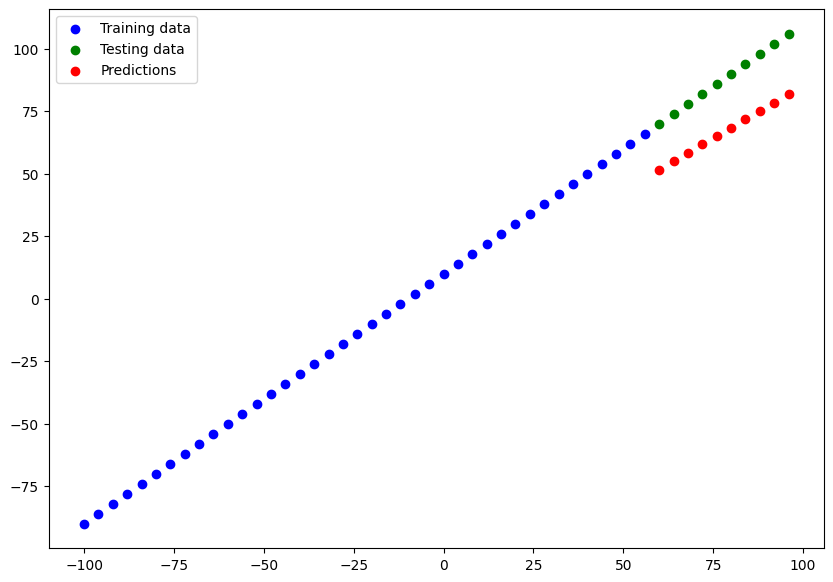

In [81]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [82]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.250381>,
 <tf.Tensor: shape=(), dtype=float32, numpy=455.0019>)

**Build `Model_2`**

* 2 dense layers, trained for 100 epochs

In [83]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3.Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 35.4428 - mse: 1763.2152
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3779 - mse: 1040.8669
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.6131 - mse: 1626.9739
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 21.4832 - mse: 659.5864
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.3806 - mse: 255.1665
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5216 - mse: 151.2996
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 12.5959 - mse: 210.7515
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0554 - mse: 148.8460
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 39.7370 - mse: 2473.3765
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 27.2255 - mse: 1042.8850
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 53ms/step


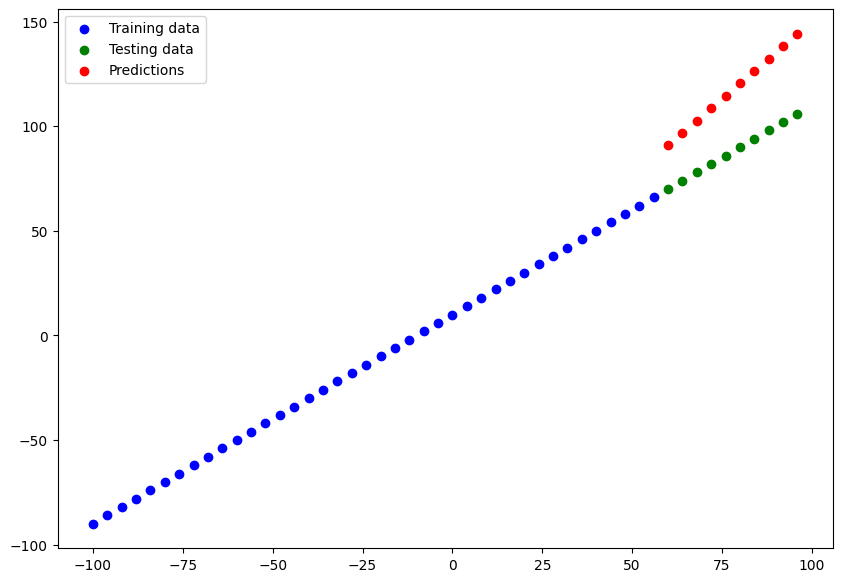

In [84]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [85]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.48154>,
 <tf.Tensor: shape=(), dtype=float32, numpy=899.9313>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [86]:
# set seed
tf.random.set_seed(42)

# 1. create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_3.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 49.0870 - mae: 49.0870
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1640 - mae: 11.1640
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 28.2210 - mae: 28.2210
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 14.1855 - mae: 14.1855
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 15.8694 - mae: 15.8694
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5838 - mae: 12.5838
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8610 - mae: 11.8610
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 12.9493 - mae: 12.9493
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 34.1516 - mae: 34.1516
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 23.5913 - mae: 23.5913
Epoch 11/500
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 54ms/step


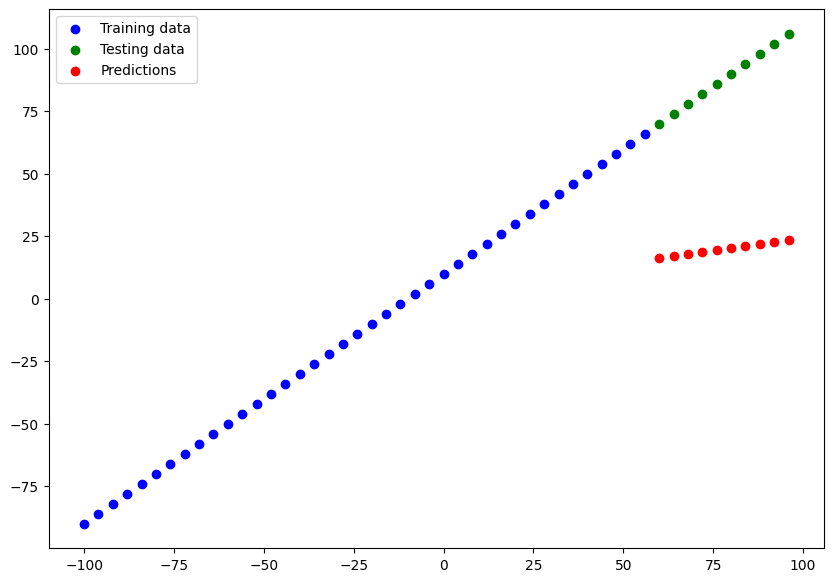

In [87]:
# make and plot our prediction
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

**overfitting**= our model trained our data too well

In [88]:
# calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94806>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4701.428>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [89]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"])
all_results

,model,mae,mse
0,model_1,21.250381,455.001892
1,model_2,29.481541,899.931274
2,model_3,67.948059,4701.428223


Looks like model_2 performed the best...

In [90]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **None:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work, Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Ressource:** As you build more models, you'll want to look into using:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later). https://www.tensorflow.org/tensorboard


* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard). https://wandb.ai/site


## Saving our models

Saving our models allow us to use the outside of Google Colab ( or wherever they were trained) such as in web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format
3. New high-level **.keras** format

https://www.tensorflow.org/tutorials/keras/save_and_load

In [91]:
!mkdir saved_models

A subdirectory or file saved_models already exists.


In [92]:
# Save model using the SavedModel format
model_2.save("./saved_models/best_model_SavedModel_format")

INFO:tensorflow:Assets written to: ./saved_models/best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: ./saved_models/best_model_SavedModel_format\assets


In [93]:
# Save the model using the HDF5 format
model_2.save("./saved_models/best_model_HDF5_format.h5")

c:\ProgramData\miniconda3\envs\tf_course\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
# Save the model using the KERAS format
model_2.save("./saved_models/best_model_KERAS_format.keras")

🔑 if you stay in tensorflow: better to keep saved model,

outside: hdf5

## Loading in a saved model

In [95]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("./saved_models/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 47ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [98]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("saved_models/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download  your files from Google Colab:

1. you can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [ ]:
!ls /concent/drive/MyDrive/tensorflow_course

## A larger example

In [1]:
# Import required libraires
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
# https://github.com/stedy/Machine-Learning-with-R-datasets
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
# convert bool to int
#insurance_one_hot = insurance_one_hot.replace({True: 1, False:0})

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
insurance_one_hot.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            int32
sex_male              int32
smoker_no             int32
smoker_yes            int32
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

(you can split cells in google golab with ctrl + shift + -)

In [5]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8728.9238 - mae: 8728.9238
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7883.4048 - mae: 7883.4048
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7606.9692 - mae: 7606.9692
Epoch 4/100
34/34 [==============================] - 0s 966us/step - loss: 7677.1304 - mae: 7677.1304
Epoch 5/100
34/34 [==============================] - 0s 995us/step - loss: 7673.5796 - mae: 7673.5796
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7662.8354 - mae: 7662.8354
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7561.4697 - mae: 7561.4697
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.5615 - mae: 7792.5615
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7614.5083 - mae: 7614.5083
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7749.0781 - mae: 7749.

In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7455.6157 - mae: 7455.6157


[7455.61572265625, 7455.61572265625]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but train for longer (200 epochs)

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # SGD didn't work (nan) so we changed
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13272.7236 - mae: 13272.7236
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13055.3662 - mae: 13055.3662
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12627.5762 - mae: 12627.5762
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11830.0107 - mae: 11830.0107
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10576.3301 - mae: 10576.3301
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9102.3525 - mae: 9102.3525
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7906.0327 - mae: 7906.0327
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7481.5493 - mae: 7481.5493
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7423.3589 - mae: 7423.3589
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7403.7334 - mae:

In [18]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4793.6660 - mae: 4793.6660


[4793.666015625, 4793.666015625]

In [19]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7455.6157 - mae: 7455.6157


[7455.61572265625, 7455.61572265625]

In [20]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13304.4639 - mae: 13304.4639
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13137.1416 - mae: 13137.1416
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12785.2471 - mae: 12785.2471
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12091.3027 - mae: 12091.3027
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10933.4160 - mae: 10933.4160
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9469.3652 - mae: 9469.3652
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8149.1914 - mae: 8149.1914
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7531.1494 - mae: 7531.1494
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7434.7559 - mae: 7434.7559
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7414.7241 - mae:

In [21]:
# Evalute our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3496.0054 - mae: 3496.0054


[3496.00537109375, 3496.00537109375]

In [22]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7455.6157 - mae: 7455.6157


[7455.61572265625, 7455.61572265625]

Text(0.5, 0, 'epochs')

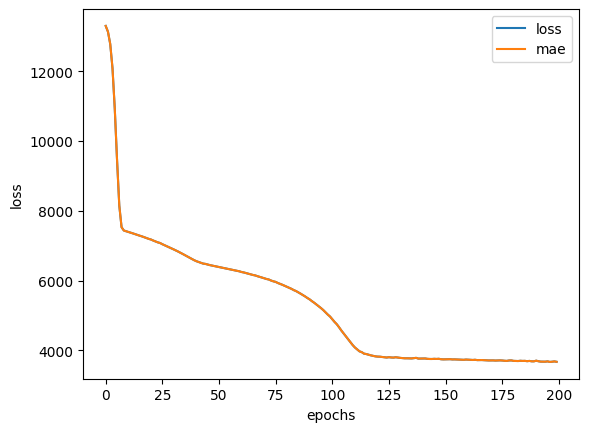

In [25]:
# Plot history (also known as a loss curve, or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🧐 **Question**: How long should you train for?

It depends. Really... it depend on the problem you're working on. However, many people have asked this question before... so TensorFLow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

🔑 Steps prepare data:
1. Turn all data into numbers (neural networks can't handle strings)
2. Make sure all of your tensors are the right shape
3. Scale features(normalize or standardize, neural networks tend to prefer normalization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

<img src="./course_images/feature_scaling.png">

<Axes: ylabel='Frequency'>

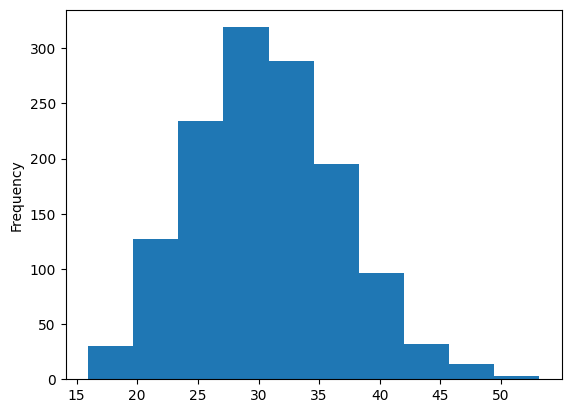

In [35]:
X["bmi"].plot(kind="hist")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [3]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [4]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [5]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful: Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see hot it goes.

In [6]:
# Build a neural network to fit on our normalized data
tf.random.set_seed(42)

# 1. create model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.8516 - mae: 13343.8516
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13335.9209 - mae: 13335.9209
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13315.9014 - mae: 13315.9014
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.0635 - mae: 13273.0635
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13195.9326 - mae: 13195.9326
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13073.2080 - mae: 13073.2080
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12894.3760 - mae: 12894.3760
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12649.4150 - mae: 12649.4150
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12328.2051 - mae: 12328.2051
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11926.20

In [7]:
# Evaluate our insurance model trained on normalize data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3434.4512 - mae: 3434.4512


[3434.451171875, 3434.451171875]

In [ ]:
# insurance model 2 results
# 9/9 [==============================] - 0s 3ms/step - loss: 4793.6660 - mae: 4793.6660